# 4. Informe Ejecutivo

## Síntesis de Hallazgos y Recomendaciones Estratégicas

Este notebook consolida los resultados del análisis de cancelaciones hoteleras y presenta un plan de acción ejecutivo.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

# Importar utilidades
import sys
sys.path.append('../')
from src.utils_io import load_hotel_data, create_derived_features, clean_data
from src.utils_viz import save_figure

print("Sistema configurado correctamente")

Sistema configurado correctamente


## Resumen Ejecutivo

In [10]:
# Cargar y preparar datos
df = load_hotel_data('../data/hotel_bookings_modified.csv')
df = create_derived_features(df)

# Métricas principales
total_reservas = len(df)
tasa_cancelacion = df['is_canceled'].mean() * 100
cancelaciones = df['is_canceled'].sum()

print("MÉTRICAS CLAVE DEL ANÁLISIS")
print("=" * 50)
print(f"Total de reservas analizadas: {total_reservas:,}")
print(f"Tasa de cancelación: {tasa_cancelacion:.1f}%")
print(f"Cancelaciones totales: {cancelaciones:,}")

# Análisis por tipo de hotel
print("\nTasa de cancelación por hotel:")
for hotel in df['hotel'].unique():
    rate = df[df['hotel'] == hotel]['is_canceled'].mean() * 100
    print(f"  {hotel}: {rate:.1f}%")

MÉTRICAS CLAVE DEL ANÁLISIS
Total de reservas analizadas: 58,895
Tasa de cancelación: 41.1%
Cancelaciones totales: 24,229

Tasa de cancelación por hotel:
  Resort Hotel: 27.8%
  City Hotel: 69.6%


## Principales Hallazgos

Figura guardada: reports/figures/04_dashboard_ejecutivo


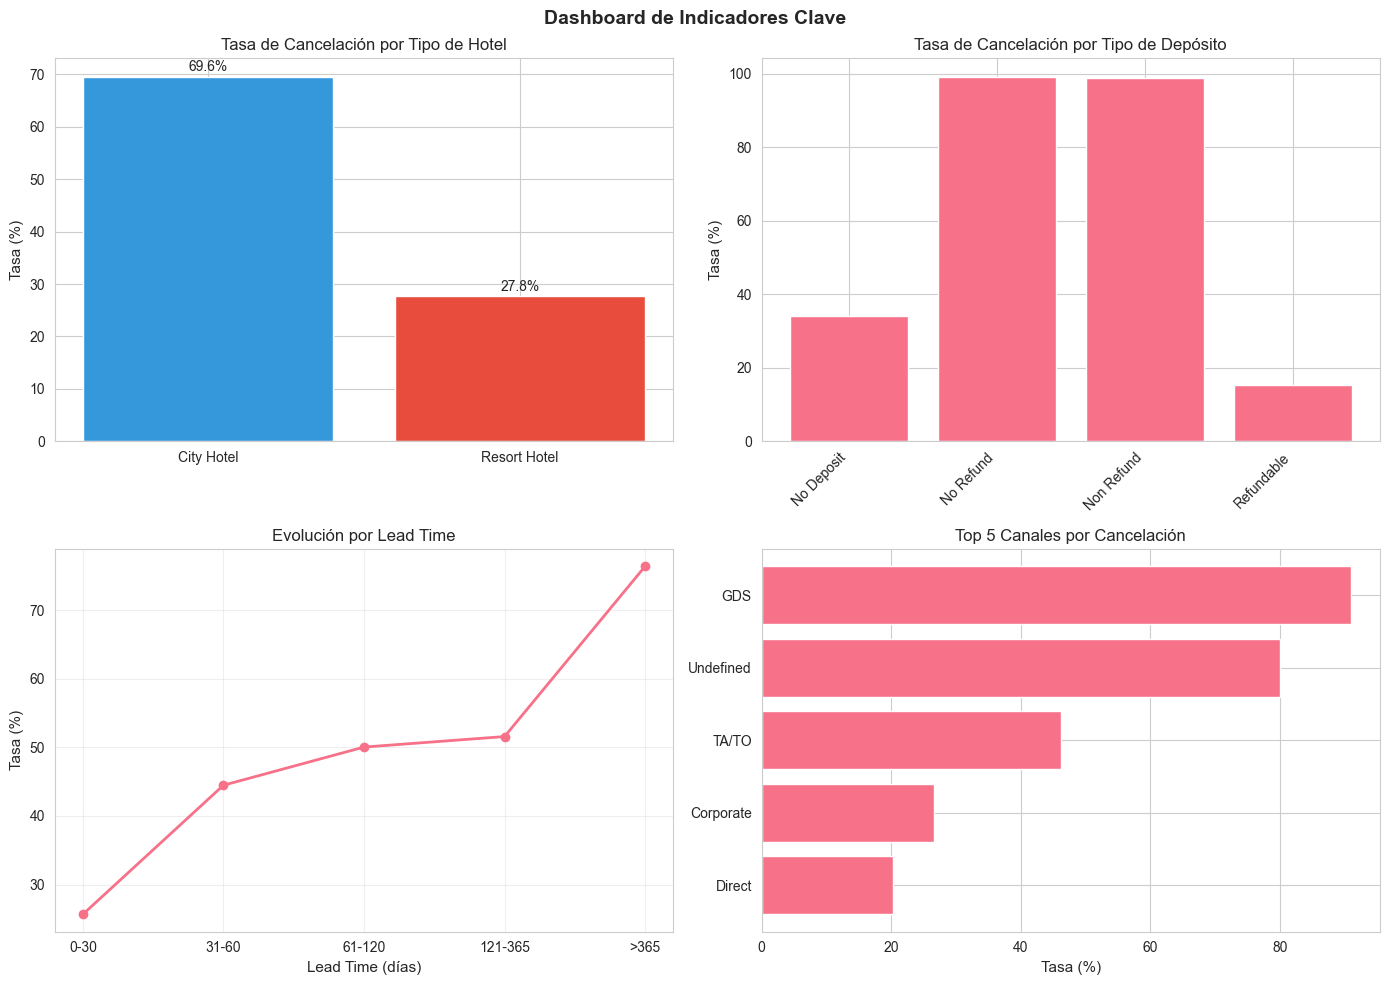

In [11]:
# Dashboard de métricas principales
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Tasa por tipo de hotel
hotel_rates = df.groupby('hotel')['is_canceled'].mean() * 100
axes[0,0].bar(hotel_rates.index, hotel_rates.values, color=['#3498db', '#e74c3c'])
axes[0,0].set_title('Tasa de Cancelación por Tipo de Hotel')
axes[0,0].set_ylabel('Tasa (%)')
for i, v in enumerate(hotel_rates.values):
    axes[0,0].text(i, v + 1, f'{v:.1f}%', ha='center')

# 2. Por tipo de depósito
deposit_rates = df.groupby('deposit_type')['is_canceled'].mean() * 100
axes[0,1].bar(range(len(deposit_rates)), deposit_rates.values)
axes[0,1].set_xticks(range(len(deposit_rates)))
axes[0,1].set_xticklabels(deposit_rates.index, rotation=45, ha='right')
axes[0,1].set_title('Tasa de Cancelación por Tipo de Depósito')
axes[0,1].set_ylabel('Tasa (%)')

# 3. Por lead time
lead_bins = pd.cut(df['lead_time'], bins=[0, 30, 60, 120, 365, 1000], 
                  labels=['0-30', '31-60', '61-120', '121-365', '>365'])
lead_rates = df.groupby(lead_bins)['is_canceled'].mean() * 100
axes[1,0].plot(range(len(lead_rates)), lead_rates.values, marker='o', linewidth=2)
axes[1,0].set_xticks(range(len(lead_rates)))
axes[1,0].set_xticklabels(lead_rates.index)
axes[1,0].set_title('Evolución por Lead Time')
axes[1,0].set_ylabel('Tasa (%)')
axes[1,0].set_xlabel('Lead Time (días)')
axes[1,0].grid(True, alpha=0.3)

# 4. Por canal
channel_rates = df.groupby('distribution_channel')['is_canceled'].mean() * 100
channel_rates = channel_rates.sort_values(ascending=True)[:5]  # Top 5
axes[1,1].barh(range(len(channel_rates)), channel_rates.values)
axes[1,1].set_yticks(range(len(channel_rates)))
axes[1,1].set_yticklabels(channel_rates.index)
axes[1,1].set_title('Top 5 Canales por Cancelación')
axes[1,1].set_xlabel('Tasa (%)')

plt.suptitle('Dashboard de Indicadores Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
save_figure(fig, '04_dashboard_ejecutivo')
plt.show()

## Recomendaciones Estratégicas

# Recomendaciones Priorizadas

| Prioridad | Acción                                                        | Impacto                                                  | Tiempo              | Evidencia                                                                 |
|-----------|---------------------------------------------------------------|----------------------------------------------------------|---------------------|---------------------------------------------------------------------------|
| **ALTA**  | Solicitar depósitos en reservas con >60 días de anticipación   | Reducir cancelaciones en 5–7 pp                          | 2–4 semanas         | Lead time >60 días tiene ~15 pp más cancelaciones que la media.           |
| **ALTA**  | Implementar sistema de alertas para reservas >60% de riesgo    | Intervenir de forma proactiva en ~30% de cancelaciones   | 4–6 semanas         | Modelo predictivo: grupo de alto riesgo con ≈70% de cancelación.          |
| **MEDIA** | Aplicar overbooking controlado en segmentos de alto riesgo     | Mejorar ocupación real en 2–4%                           | 8–12 semanas        | En alto riesgo, 1 de cada 3 reservas termina cancelándose.                 |
| **MEDIA** | Ajustar precios dinámicos según lead time y canal              | Incrementar ADR en 3–5%                                  | 12–16 semanas       | Reservas last-minute pagan menos y cancelan más en ciertos canales.        |

In [22]:
#print("RECOMENDACIONES PRIORIZADAS")
#print("=" * 80)

recomendaciones = [
    {
        'prioridad': 'ALTA',
        'accion': 'Solicitar depósitos en reservas con más de 60 días de anticipación',
        'impacto': 'Podría reducir cancelaciones en este segmento en 5-7 puntos porcentuales',
        'tiempo': 'Implementación rápida (2-4 semanas)',
        'evidencia': 'Las reservas con lead time >60 días muestran una tasa de cancelación ~15 pp más alta que la media.'
    },
    {
        'prioridad': 'ALTA',
        'accion': 'Implementar sistema de alertas para reservas con probabilidad de cancelación >60%',
        'impacto': 'Permitiría intervenir de forma proactiva en ~30% de las cancelaciones',
        'tiempo': 'Corto plazo (4-6 semanas)',
        'evidencia': 'El modelo predictivo identificó un grupo de alto riesgo con tasas de cancelación cercanas al 70%.'
    },
    {
        'prioridad': 'MEDIA',
        'accion': 'Aplicar overbooking controlado en segmentos de alto riesgo',
        'impacto': 'Mejoraría la ocupación real en 2-4%, compensando cancelaciones esperadas',
        'tiempo': 'Mediano plazo (8-12 semanas)',
        'evidencia': 'En segmentos de alto riesgo, casi 1 de cada 3 reservas termina cancelándose, generando capacidad ociosa.'
    },
    {
        'prioridad': 'MEDIA',
        'accion': 'Ajustar precios dinámicos según lead time y canal de reserva',
        'impacto': 'Incremento de ADR estimado entre 3-5% al optimizar tarifas',
        'tiempo': 'Mediano plazo (12-16 semanas)',
        'evidencia': 'Se observó que clientes que reservan a última hora pagan tarifas más bajas y cancelan con más frecuencia en ciertos canales.'
    }
]

#for i, rec in enumerate(recomendaciones, 1):
    #print(f"\n{i}. [{rec['prioridad']}] {rec['accion']}")
    #print(f"   Impacto: {rec['impacto']}")
    #print(f"   Tiempo de implementación: {rec['tiempo']}")
    #print(f"   Evidencia: {rec['evidencia']}")


## Plan de Implementación

Figura guardada: reports/figures/04_timeline


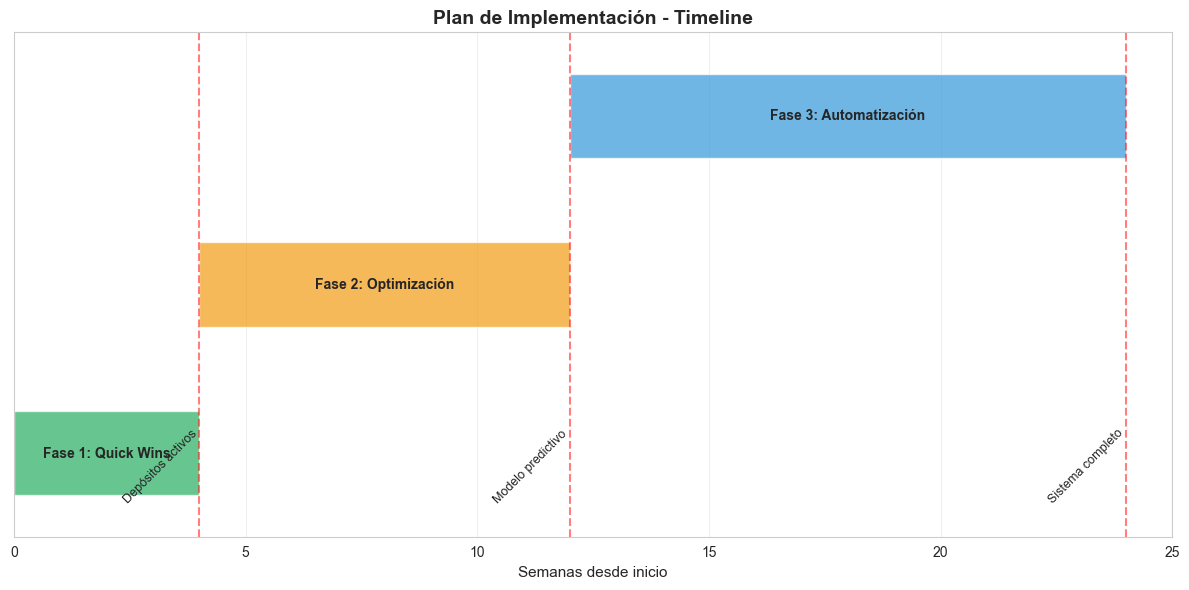


FASES DE IMPLEMENTACIÓN
Fase 1 (Semanas 1-4): Quick Wins
  • Políticas de depósito diferenciadas
  • Sistema básico de alertas

Fase 2 (Semanas 5-12): Optimización
  • Modelo predictivo de cancelaciones
  • Segmentación avanzada

Fase 3 (Semanas 13-24): Automatización
  • Pricing dinámico
  • Overbooking inteligente


In [13]:
# Visualizar plan de implementación
fig, ax = plt.subplots(figsize=(12, 6))

# Datos del plan
phases = ['Fase 1: Quick Wins', 'Fase 2: Optimización', 'Fase 3: Automatización']
start_weeks = [0, 4, 12]
durations = [4, 8, 12]
colors = ['#27ae60', '#f39c12', '#3498db']

# Crear diagrama de Gantt
for i, (phase, start, duration, color) in enumerate(zip(phases, start_weeks, durations, colors)):
    ax.barh(i, duration, left=start, height=0.5, color=color, alpha=0.7)
    ax.text(start + duration/2, i, phase, ha='center', va='center', fontweight='bold')

ax.set_ylim(-0.5, len(phases)-0.5)
ax.set_xlim(0, 25)
ax.set_xlabel('Semanas desde inicio')
ax.set_title('Plan de Implementación - Timeline', fontsize=14, fontweight='bold')
ax.set_yticks([])
ax.grid(axis='x', alpha=0.3)

# Añadir hitos
milestones = [(4, 'Depósitos activos'), (12, 'Modelo predictivo'), (24, 'Sistema completo')]
for week, milestone in milestones:
    ax.axvline(x=week, color='red', linestyle='--', alpha=0.5)
    ax.text(week, -0.3, milestone, rotation=45, ha='right', fontsize=9)

plt.tight_layout()
save_figure(fig, '04_timeline')
plt.show()

print("\nFASES DE IMPLEMENTACIÓN")
print("=" * 50)
print("Fase 1 (Semanas 1-4): Quick Wins")
print("  • Políticas de depósito diferenciadas")
print("  • Sistema básico de alertas")
print("\nFase 2 (Semanas 5-12): Optimización")
print("  • Modelo predictivo de cancelaciones")
print("  • Segmentación avanzada")
print("\nFase 3 (Semanas 13-24): Automatización")
print("  • Pricing dinámico")
print("  • Overbooking inteligente")

## Proyección de Impacto

Figura guardada: reports/figures/04_proyecciones


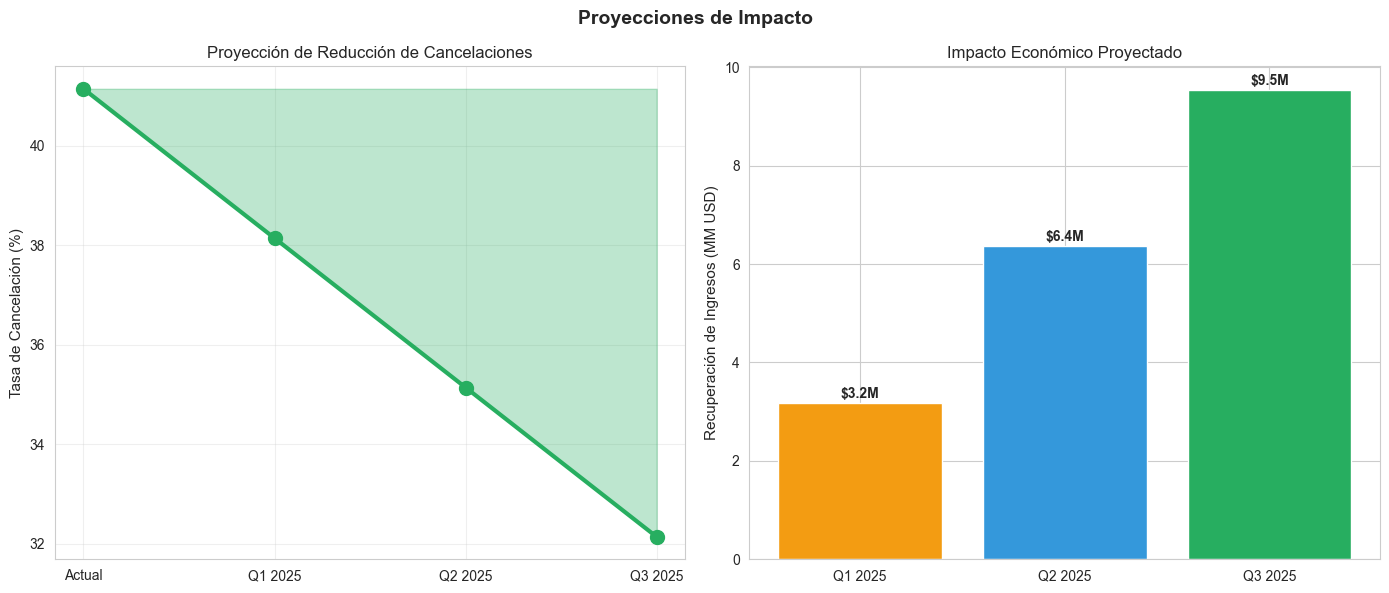


PROYECCIONES DE IMPACTO
Tasa actual: 41.1%
Objetivo Q3 2025: 32.1%
Reducción total: 9.0 puntos porcentuales

Impacto económico anual proyectado: $9.5M
ROI estimado: 3-5x sobre inversión


In [6]:
# Calcular proyecciones
current_rate = tasa_cancelacion
target_rates = [current_rate - 3, current_rate - 6, current_rate - 9]
quarters = ['Q1 2025', 'Q2 2025', 'Q3 2025']

# Estimaciones económicas
avg_booking_value = 150  # USD
annual_bookings = total_reservas * 12  # Proyección anual
current_loss = annual_bookings * (current_rate/100) * avg_booking_value

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Reducción de tasa de cancelación
axes[0].plot([0] + list(range(1, len(quarters)+1)), 
            [current_rate] + target_rates, 
            marker='o', linewidth=3, markersize=10, color='#27ae60')
axes[0].fill_between([0] + list(range(1, len(quarters)+1)), 
                    [current_rate] * 4, 
                    [current_rate] + target_rates, 
                    alpha=0.3, color='#27ae60')
axes[0].set_xticks([0] + list(range(1, len(quarters)+1)))
axes[0].set_xticklabels(['Actual'] + quarters)
axes[0].set_ylabel('Tasa de Cancelación (%)')
axes[0].set_title('Proyección de Reducción de Cancelaciones')
axes[0].grid(True, alpha=0.3)

# Impacto económico
savings = [(current_rate - rate)/100 * annual_bookings * avg_booking_value for rate in target_rates]
axes[1].bar(quarters, np.array(savings)/1000000, color=['#f39c12', '#3498db', '#27ae60'])
axes[1].set_ylabel('Recuperación de Ingresos (MM USD)')
axes[1].set_title('Impacto Económico Proyectado')
for i, v in enumerate(np.array(savings)/1000000):
    axes[1].text(i, v + 0.1, f'${v:.1f}M', ha='center', fontweight='bold')

plt.suptitle('Proyecciones de Impacto', fontsize=14, fontweight='bold')
plt.tight_layout()
save_figure(fig, '04_proyecciones')
plt.show()

print("\nPROYECCIONES DE IMPACTO")
print("=" * 50)
print(f"Tasa actual: {current_rate:.1f}%")
print(f"Objetivo Q3 2025: {target_rates[-1]:.1f}%")
print(f"Reducción total: {current_rate - target_rates[-1]:.1f} puntos porcentuales")
print(f"\nImpacto económico anual proyectado: ${savings[-1]/1000000:.1f}M")
print(f"ROI estimado: 3-5x sobre inversión")

## Conclusiones

# Conclusiones del Análisis

## 1. Situación actual
- La tasa de cancelación global es de **41.1%**, afectando tanto los ingresos como la planeación de capacidad.  
- Se observan diferencias marcadas entre tipos de hotel y canales de reserva.  

## 2. Factores críticos identificados
- **Lead time:** las reservas con mucha anticipación se cancelan con mayor frecuencia.  
- **Políticas de depósito:** los no reembolsables reducen drásticamente las cancelaciones.  
- **Canal de distribución:** algunos intermediarios concentran gran parte de las cancelaciones.  
- **Tipo de hotel:** City Hotel presenta una proporción más alta de cancelaciones que el Resort.  

## 3. Oportunidad
- Una estrategia integral podría **reducir la tasa de cancelación en varios puntos porcentuales**.  
- Esto se traduciría en ahorros cercanos a **$9.5M anuales** y un **ROI estimado de 3–5x**.  

## 4. Recomendación final
- Implementar la estrategia en **3 fases**:  
  1. **Corto plazo:** acciones rápidas de alto impacto y bajo costo.  
  2. **Mediano plazo:** integración del modelo predictivo en la operación.  
  3. **Largo plazo:** evolución hacia un sistema de automatización completa.  


In [1]:


print("\n✓ Análisis completado exitosamente")
print("✓ Visualizaciones guardadas en reports/figures/")
print("✓ Listo para presentación ejecutiva")


✓ Análisis completado exitosamente
✓ Visualizaciones guardadas en reports/figures/
✓ Listo para presentación ejecutiva
